In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Loading our dataset to understand its features.
data = pd.read_csv('data_set.csv')

In [3]:
data.head()

,title,abstract,ai_generated,is_ai_generated
0,Are Advanced Potentials Anomalous?,Advanced electromagnetic potentials are indi...,False,0
1,Are Advanced Potentials Anomalous?,This research paper investigates the question ...,True,1
2,An efficient centralized binary multicast netw...,We give an algorithm for finding network enc...,False,0
3,An efficient centralized binary multicast netw...,The paper presents an efficient centralized bi...,True,1
4,Percolation transition in networks with degree...,We introduce an exponential random graph mod...,False,0


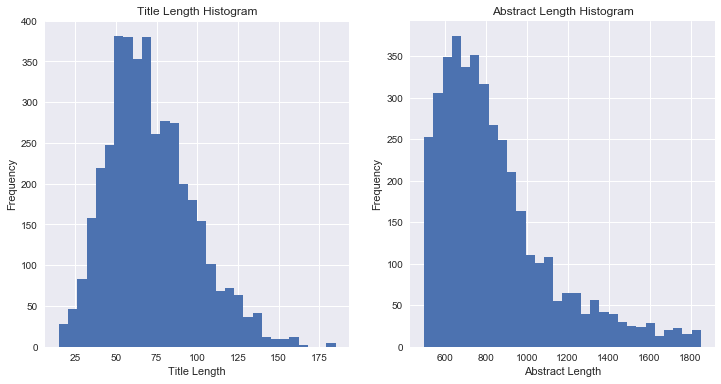

In [4]:
# Let's explore the length of titles and abstracts in our dataset.
data['title_length'] = data['title'].apply(len)
data['abstract_length'] = data['abstract'].apply(len)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['title_length'].plot(kind='hist', bins=30)
plt.title('Title Length Histogram')
plt.xlabel('Title Length')

plt.subplot(1, 2, 2)
data['abstract_length'].plot(kind='hist', bins=30)
plt.title('Abstract Length Histogram')
plt.xlabel('Abstract Length')
plt.show()

In [7]:
# Moving on, let's delve into the content by analyzing the words used in the titles and abstracts.
# Tokenize and count word frequencies for human and AI-generated abstracts after removing stop words
stop_words = set(stopwords.words('english'))

def count_words_without_stopwords(text):
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    words = [word for word in words if word not in stop_words]
    return Counter(words)

human_word_counts = count_words_without_stopwords(" ".join(human_data['abstract']))
ai_word_counts = count_words_without_stopwords(" ".join(ai_data['abstract']))

# Display most common words after stop word removal
print("Most common words in human-written abstracts after removing stop words:")
print(human_word_counts.most_common(10))
print("\nMost common words in AI-generated abstracts after removing stop words:")
print(ai_word_counts.most_common(10))


def count_words(text):
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return Counter(words)

human_data = data[data['ai_generated'] == False]
ai_data = data[data['ai_generated'] == True]

human_word_counts = count_words(" ".join(human_data['abstract']))
ai_word_counts = count_words(" ".join(ai_data['abstract']))

Most common words in human-written abstracts after removing stop words:
[('model', 852), ('results', 685), ('field', 681), ('two', 651), ('show', 636), ('also', 621), ('quantum', 595), ('using', 584), ('energy', 556), ('system', 486)]

Most common words in AI-generated abstracts after removing stop words:
[('paper', 3182), ('research', 2601), ('study', 2302), ('results', 981), ('properties', 972), ('quantum', 945), ('understanding', 926), ('behavior', 892), ('systems', 821), ('findings', 805)]


In [8]:
# Let's discover the most frequent words used in human-written and AI-generated abstracts.
print("Most common words in human-written abstracts:")
print(human_word_counts.most_common(10))
print("\nMost common words in AI-generated abstracts:")
print(ai_word_counts.most_common(10))

Most common words in human-written abstracts:
[('the', 22984), ('of', 13922), ('a', 7250), ('and', 7041), ('in', 6510), ('to', 5724), ('is', 4319), ('we', 3970), ('for', 3087), ('that', 2959)]

Most common words in AI-generated abstracts:
[('the', 24869), ('of', 13507), ('and', 8710), ('in', 4954), ('a', 4850), ('to', 4070), ('that', 3774), ('paper', 3182), ('for', 2994), ('this', 2697)]


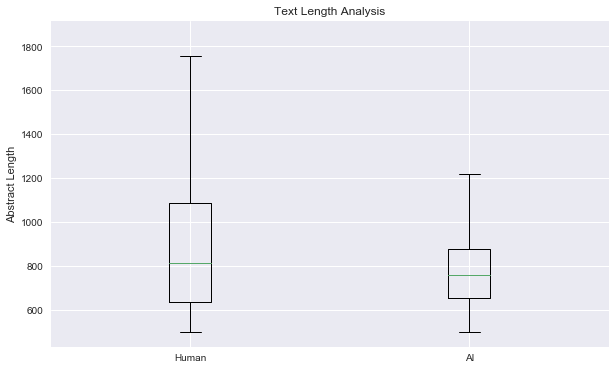

In [9]:
# Continuing our exploration, let's look at the length distribution of human and AI-generated abstracts.
human_avg_length = human_data['abstract_length'].mean()
ai_avg_length = ai_data['abstract_length'].mean()
human_max_length = human_data['abstract_length'].max()
ai_max_length = ai_data['abstract_length'].max()

plt.figure(figsize=(10, 6))
plt.boxplot([human_data['abstract_length'], ai_data['abstract_length']], labels=['Human', 'AI'])
plt.ylabel('Abstract Length')
plt.title('Text Length Analysis')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


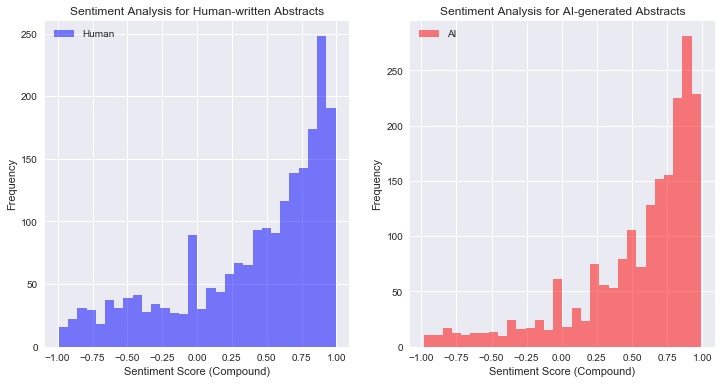

In [10]:
# Now, we'll delve into the sentiments expressed in these abstracts.
sia = SentimentIntensityAnalyzer()

human_data['sentiment'] = human_data['abstract'].apply(lambda x: sia.polarity_scores(x))
ai_data['sentiment'] = ai_data['abstract'].apply(lambda x: sia.polarity_scores(x))

# Visualizing the sentiment scores of human-written and AI-generated abstracts.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(human_data['sentiment'].apply(lambda x: x['compound']), bins=30, color='blue', alpha=0.5, label='Human')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis for Human-written Abstracts')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ai_data['sentiment'].apply(lambda x: x['compound']), bins=30, color='red', alpha=0.5, label='AI')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis for AI-generated Abstracts')
plt.legend()
plt.show()

In [11]:
# N-gram Analysis to understand word combinations in abstracts.
def extract_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

human_bigrams = human_data['abstract'].apply(lambda x: extract_ngrams(x, 2)).sum()
human_bigram_counts = Counter(human_bigrams)

ai_bigrams = ai_data['abstract'].apply(lambda x: extract_ngrams(x, 2)).sum()
ai_bigram_counts = Counter(ai_bigrams)

In [12]:
# Now, let's prepare our data for machine learning models.
train_data, test_data, train_labels, test_labels = train_test_split(data['abstract'], data['is_ai_generated'], test_size=0.2, random_state=42)

In [13]:
# Text Preprocessing to prepare text data for model training.
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

train_data = train_data.apply(preprocess_text)
test_data = test_data.apply(preprocess_text)

In [14]:
# Text Vectorization using TF-IDF to convert text data into numerical format.
tfidf_vectorizer = TfidfVectorizer(max_features=4500)
tfidf_vectorizer.fit(train_data)
train_vectors = tfidf_vectorizer.transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

In [15]:
# Now, let's train various machine learning models and evaluate their performances.

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(train_vectors, train_labels)
logistic_predictions = logistic_model.predict(test_vectors)

In [16]:
# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(test_labels, logistic_predictions)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Classification Report:")
print(classification_report(test_labels, logistic_predictions))

Logistic Regression Accuracy: 0.98150431566
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       438
          1       0.99      0.97      0.98       373

avg / total       0.98      0.98      0.98       811



In [17]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(train_vectors, train_labels)
nb_predictions = nb_model.predict(test_vectors)

# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(test_labels, nb_predictions)
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(test_labels, nb_predictions))

Multinomial Naive Bayes Accuracy: 0.96794081381
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.95      0.97       438
          1       0.94      0.99      0.97       373

avg / total       0.97      0.97      0.97       811



In [18]:
# Support Vector Machines
svm_model = SVC(random_state=42)
svm_model.fit(train_vectors, train_labels)
svm_predictions = svm_model.predict(test_vectors)

# Evaluate SVM model
accuracy_svm = accuracy_score(test_labels, svm_predictions)
print("Support Vector Machines Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(test_labels, svm_predictions))

Support Vector Machines Accuracy: 0.540073982737
Classification Report:
             precision    recall  f1-score   support

          0       0.54      1.00      0.70       438
          1       0.00      0.00      0.00       373

avg / total       0.29      0.54      0.38       811



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(train_vectors, train_labels)
tree_predictions = tree_model.predict(test_vectors)

# Evaluate Decision Tree model
accuracy_tree = accuracy_score(test_labels, tree_predictions)
print("Decision Tree Accuracy:", accuracy_tree)
print("Classification Report:")
print(classification_report(test_labels, tree_predictions))

Decision Tree Accuracy: 0.958076448829
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       438
          1       0.95      0.95      0.95       373

avg / total       0.96      0.96      0.96       811



In [20]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_vectors, train_labels)
rf_predictions = rf_model.predict(test_vectors)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(test_labels, rf_predictions)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(test_labels, rf_predictions))

Random Forest Accuracy: 0.976572133169
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       438
          1       0.97      0.98      0.97       373

avg / total       0.98      0.98      0.98       811



In [21]:
# Feature Importance Analysis to identify the most influential features for our models.
feature_names = tfidf_vectorizer.get_feature_names()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_model.coef_[0]})
sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)
top_features = sorted_coefficients.head(10)

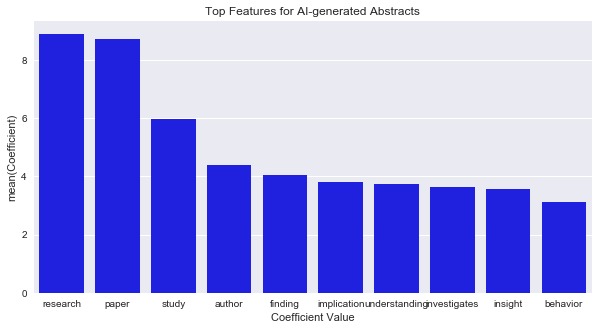

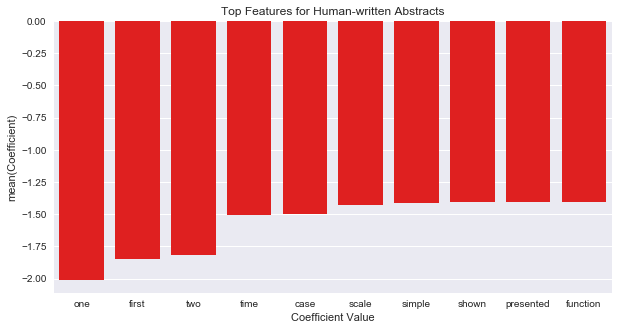

In [28]:
# Visualizing the top features for AI-generated and human-written abstracts.
ai_features = coefficients_df[coefficients_df['Coefficient'] > 0].nlargest(10, 'Coefficient')
human_features = coefficients_df[coefficients_df['Coefficient'] < 0].nsmallest(10, 'Coefficient')

plt.figure(figsize=(10, 5))
sns.barplot(ai_features['Feature'], ai_features['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Top Features for AI-generated Abstracts')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(human_features['Feature'], human_features['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.title('Top Features for Human-written Abstracts')
plt.show()

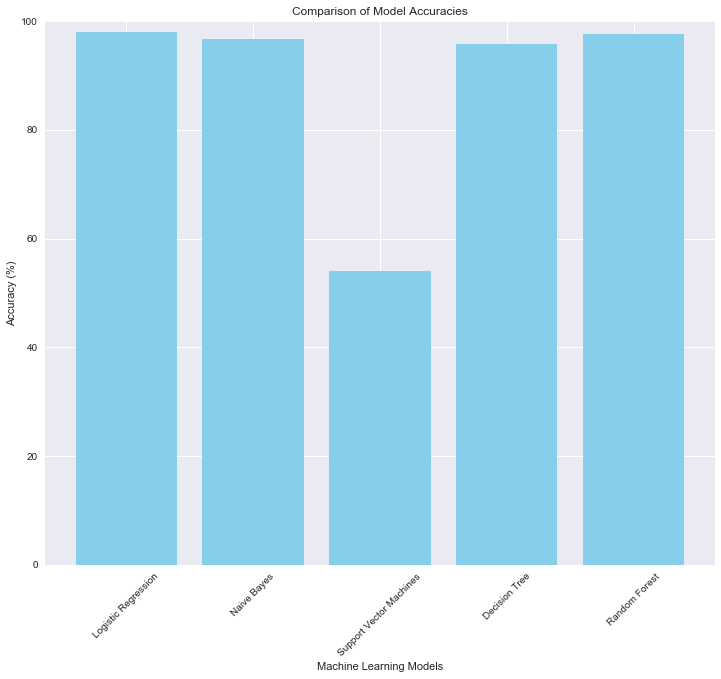

In [33]:
# List of model names and their accuracies
model_names = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 'Decision Tree', 'Random Forest']
accuracies = [98.1, 96.7, 54.0, 95.8, 97.6]  # Accuracy values in percentage

# Create numerical x-axis positions for the bars
x_pos = range(len(model_names))

# Plotting the accuracies
plt.figure(figsize=(12, 10))
plt.bar(x_pos, accuracies, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xticks(x_pos, model_names, rotation=45)  # Set x-axis tick positions and labels
plt.ylim(0, 100)  # Set y-axis limits to percentage scale
plt.show()
